<a href="https://colab.research.google.com/github/axel-sirota/model_training_best_practices/blob/master/module2/ModelTraining_Mod2Demo1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

© Data Trainers LLC. GPL v 3.0.

Author: Axel Sirota

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, model_selection, metrics

import warnings
warnings.filterwarnings('ignore')

First let's download the dataset

In [2]:
%%writefile get_data.sh
mkdir -p data
if [ ! -f data/glass.csv ]; then
  wget -O data/glass.csv https://www.dropbox.com/scl/fi/dv522a61am4dsc3vkfp4p/glass.csv?rlkey=6l9v685sw98plzj2myvtjpes6&dl=0
fi

Writing get_data.sh


In [3]:
!bash get_data.sh

In [4]:
glass = pd.read_csv('data/glass.csv')
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'data/glass.csv'

**Pretend we want to predict `ri`, and our only feature is `al`. How could we do it using machine learning?**


**Answer:** We could frame it as a regression problem, and use a linear regression model with **`al`** as the only feature and **`ri`** as the response.


First let's do a plot to see the behaivour

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

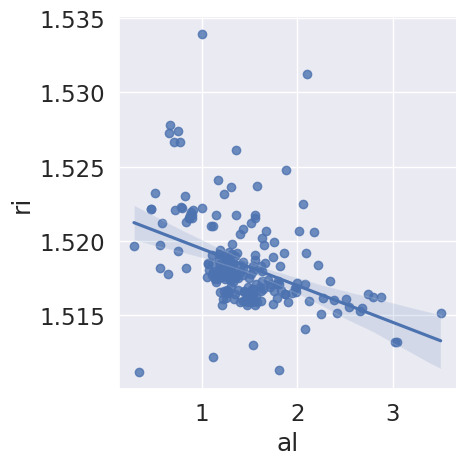

In [6]:
sns.lmplot(x='al', y='ri', data=glass);


To build a linear regression model to predict `ri` using scikit-learn, we will need to Import `LinearRegression` from `linear_model`.

**Using `LinearRegression`, fit a model predicting `ri` from `al` (and an intercept).**

In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri



In [9]:
X.head()

,al
0,1.10
1,1.36
2,1.54
3,1.29
4,1.24


In [10]:
y.head()

0    1.52101
1    1.51761
2    1.51618
3    1.51766
4    1.51742
Name: ri, dtype: float64

In [11]:
linreg.fit(X,y)

LinearRegression()

**Using the `LinearRegression` object we have fit, create a variable that are our predictions for `ri` for each row's `al` in the data set.**


In [12]:
# Make predictions for all values of X and add back to the original DataFrame.
y_pred = linreg.predict(X)

# new column of y_pred
glass['y_pred'] = y_pred

In [13]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873


Text(0.5, 1.0, 'Relationship between refractive index and aluminium density')

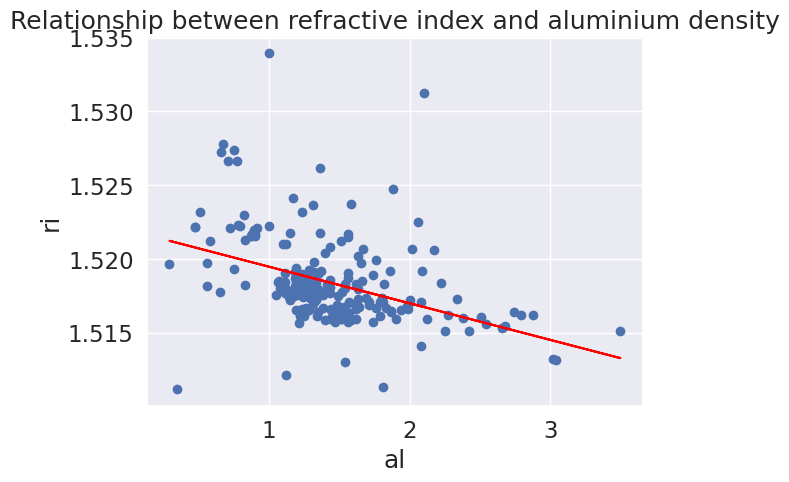

In [16]:
# Put the plots together (use a scatter and line graph).
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.y_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')
plt.title("Relationship between refractive index and aluminium density")

## Refresher: Interpreting Linear Regression Coefficients
---

Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `al` predictor.

In [17]:
print(linreg.intercept_)
print(linreg.coef_)

1.5219453302386425
[-0.00247761]


Predicting for al = 2

In [18]:
1.5219 - 0.002477 * 2

1.5169460000000001

In [21]:
linreg.predict([[2]])

array([1.51699012])